# Data Analytics Pathway Assessment

## by Richmond Tetteh

### Introduction

This document explores a direct marketing campaigns (phone calls) dataset of a banking institution to build a predictive model that determines the likelihood of a client subscribing to a term deposit based on the features provided in the dataset.

Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Upload the ZIP file
from google.colab import files
uploaded = files.upload()


Saving data_4.zip to data_4.zip


In [3]:
import zipfile
import io

# Get the uploaded ZIP file name
data_4 = list(uploaded.keys())[0]

# Extract the ZIP file
with zipfile.ZipFile(io.BytesIO(uploaded[data_4]), 'r') as zip_ref:
    zip_ref.extractall("extracted")  # Extract to a folder named 'extracted'

In [4]:
import os

# List the extracted files to find the CSV name
print(os.listdir("extracted/data"))



['bank-additional.csv', 'bank-names.txt', 'bank-additional-full.csv', 'bank-full.csv', 'bank.csv']


In [5]:
# Read the CSV file from the extracted folder
bank_additional_full = pd.read_csv("extracted/data/bank-additional-full.csv", delimiter=';')

# Preview the dataset
bank_additional_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Assessing Data

In [6]:
# high-level overview of data shape and composition
print(bank_additional_full.shape)
print(bank_additional_full.dtypes)
print(bank_additional_full.head(10))

(41188, 21)
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object
   age          job  marital            education  default housing loan  \
0   56    housemaid  married             basic.4y       no      no   no   
1   57     services  married          high.school  unknown      no   no   
2   37     services  married          high.school       no     yes   no   
3   40       admin.  married             basic.6y       no      no   no   
4   56     services  married          high.school    

In [7]:
print("\nTarget distribution (y):\n", bank_additional_full["y"].value_counts(normalize=True))


Target distribution (y):
 y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64


In [8]:
bank_additional_full.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
bank_additional_full.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [10]:
bank_additional_full.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
7167,51,blue-collar,married,basic.6y,unknown,yes,yes,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
6140,33,management,married,university.degree,no,yes,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
14890,25,services,married,high.school,unknown,no,no,cellular,jul,wed,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,no
29045,56,self-employed,divorced,university.degree,unknown,no,no,telephone,apr,fri,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
12467,35,blue-collar,married,basic.9y,no,no,no,telephone,jul,mon,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,yes


In [11]:
bank_additional_full.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [12]:
bank_additional_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [13]:
bank_additional_full.marital.value_counts()

,count
marital,
married,24928
single,11568
divorced,4612
unknown,80


In [14]:
bank_additional_full.education.value_counts()

,count
education,
university.degree,12168
high.school,9515
basic.9y,6045
professional.course,5243
basic.4y,4176
basic.6y,2292
unknown,1731
illiterate,18


In [15]:
bank_additional_full.job.value_counts()

,count
job,
admin.,10422
blue-collar,9254
technician,6743
services,3969
management,2924
retired,1720
entrepreneur,1456
self-employed,1421
housemaid,1060


In [16]:
bank_additional_full.day_of_week.value_counts()

,count
day_of_week,
thu,8623
mon,8514
wed,8134
tue,8090
fri,7827


In [17]:
bank_additional_full.default.value_counts()

,count
default,
no,32588
unknown,8597
yes,3


 Check Missing Values

In [18]:
# Check for missing values (coded as 'unknown' in categorical columns)
missing_values = bank_additional_full.replace('unknown', np.nan).isna().sum()
print("Missing Values (after replacing 'unknown'):")
print(missing_values[missing_values > 0])

Missing Values (after replacing 'unknown'):
job           330
marital        80
education    1731
default      8597
housing       990
loan          990
dtype: int64


Observations:
default (3,859), housing (990), loan (990), job (330), education (1,731) have missing values.

Action:

Drop default (too many missing values).

Replace remaining "unknown" with mode (most frequent category).

Data Types & Unique Values

In [19]:
print("\nData Types:")
print(bank_additional_full.dtypes)

# Check unique values in categorical columns
categorical_cols = bank_additional_full.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(bank_additional_full[col].unique())


Data Types:
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

Unique values in job:
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Unique values in marital:
['married' 'single' 'divorced' 'unknown']

Unique values in education:
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Unique values in default:
['no' 'unknown

Observations:
Categorical columns should be encoded.

pdays (days since last contact) has 999 for "not previously contacted". This should be treated separately.

Data Cleaning

In [20]:
# Make copies of original pieces of data
bank_additional_full_clean = bank_additional_full.copy()

Test

In [21]:
bank_additional_full_clean.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Issue #1: Handling Missing Values of Default Column




Define:
Drop the column default because it has a high count of missing values (8597)

Code

In [22]:
# Drop default column
bank_additional_full_clean = bank_additional_full_clean.drop('default', axis=1)


Test

In [23]:
bank_additional_full_clean.head(2)

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [24]:
# Storing Data
# Save gathered, assessed, and cleaned master dataset to a CSV file named "bank_archive_master.csv.

bank_additional_full_clean.to_csv('bank_archive_master', index = False)

In [25]:
# load in the dataset into a pandas dataframe
bank_graph = pd.read_csv('bank_archive_master')

# Visualizations

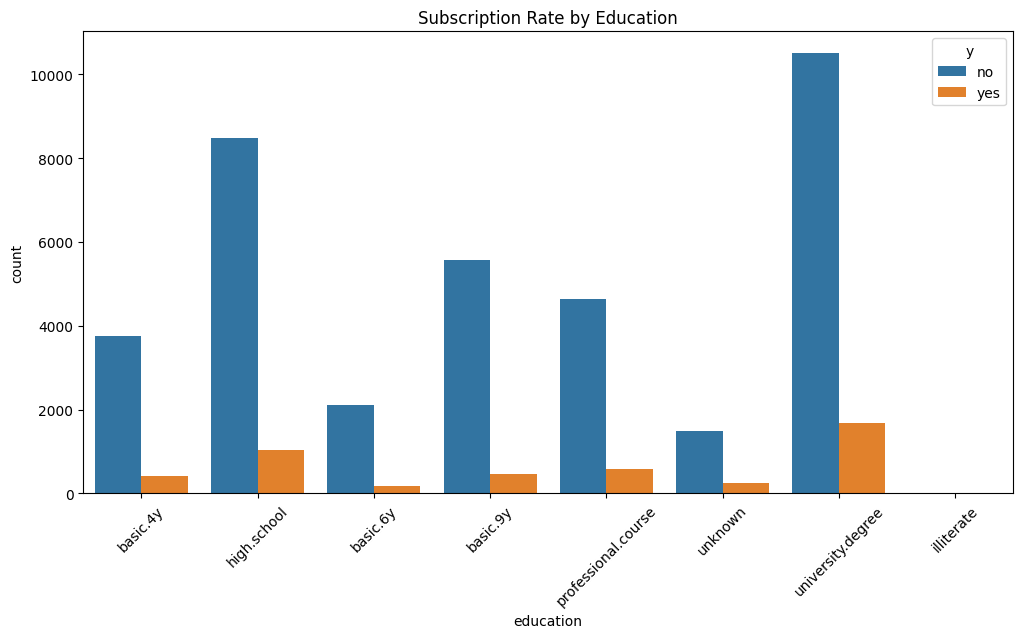

In [26]:
#Subscription rate by education
plt.figure(figsize=(12, 6))
sns.countplot(x="education", hue="y", data=bank_graph)
plt.xticks(rotation=45)
plt.title("Subscription Rate by Education")
plt.show()

From the visualization it is observed that people with a university degree were observed to have a higer count of people who decided not to subscribe and at the same time recorded the highest number of people who subscribed. The illiterate category had no people either subscribing or not subscribing.

It will make more business sense to target those who have a university degree and a high school certificate because they have a higher count of yes subscription.

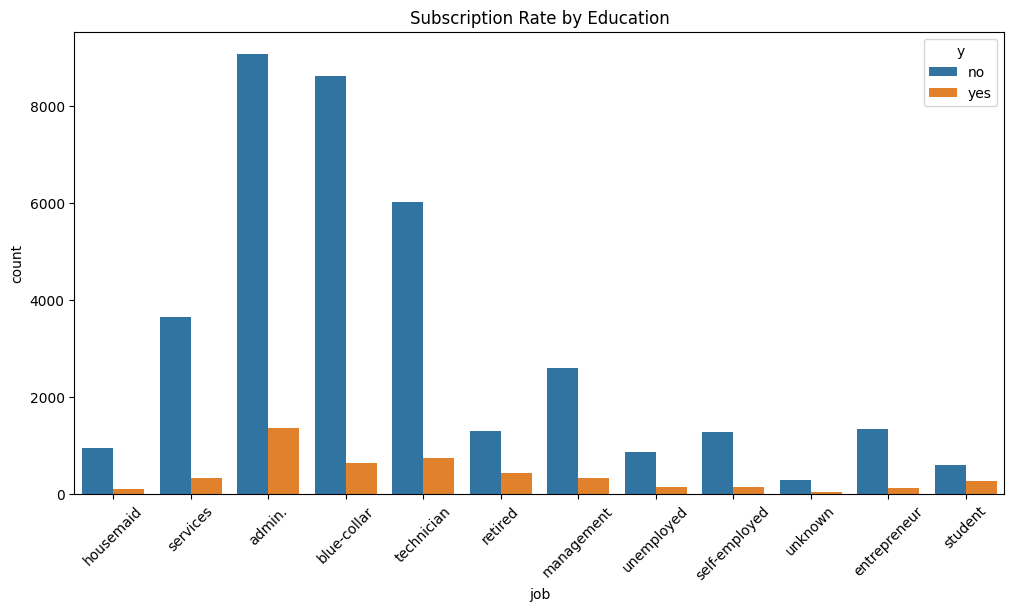

In [27]:
#Subscription rate by job
plt.figure(figsize=(12, 6))
sns.countplot(x="job", hue="y", data=bank_graph)
plt.xticks(rotation=45)
plt.title("Subscription Rate by Education")
plt.show()

From the visualization it can be deduced that those who work in administration roles have the highest count of people not subscribing to the service followed by those in blue-collar job. Also those in the administration role have the highest count of people subscribing to the service followed by the technicians.

It will make more business sense to target those in the administration, blue-collar and technician roles because they have a higher count of yes subscription.  

<Figure size 1200x600 with 0 Axes>

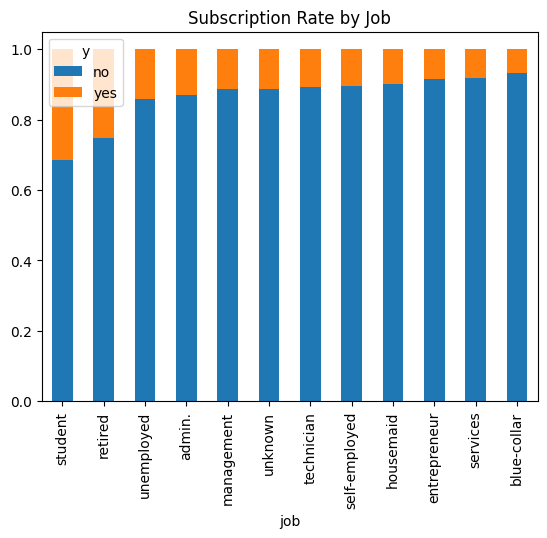

In [28]:
#Subscription rate by job
plt.figure(figsize=(12, 6))
job_y = bank_graph.groupby('job')['y'].value_counts(normalize=True).unstack().sort_values('yes', ascending=False)
job_y.plot(kind='bar', stacked=True)
plt.title("Subscription Rate by Job")
plt.show()

From the stacked bar chart the student job category has a higher count of people subscribing and those in the blue-collar job have a lower count of those subscribing.

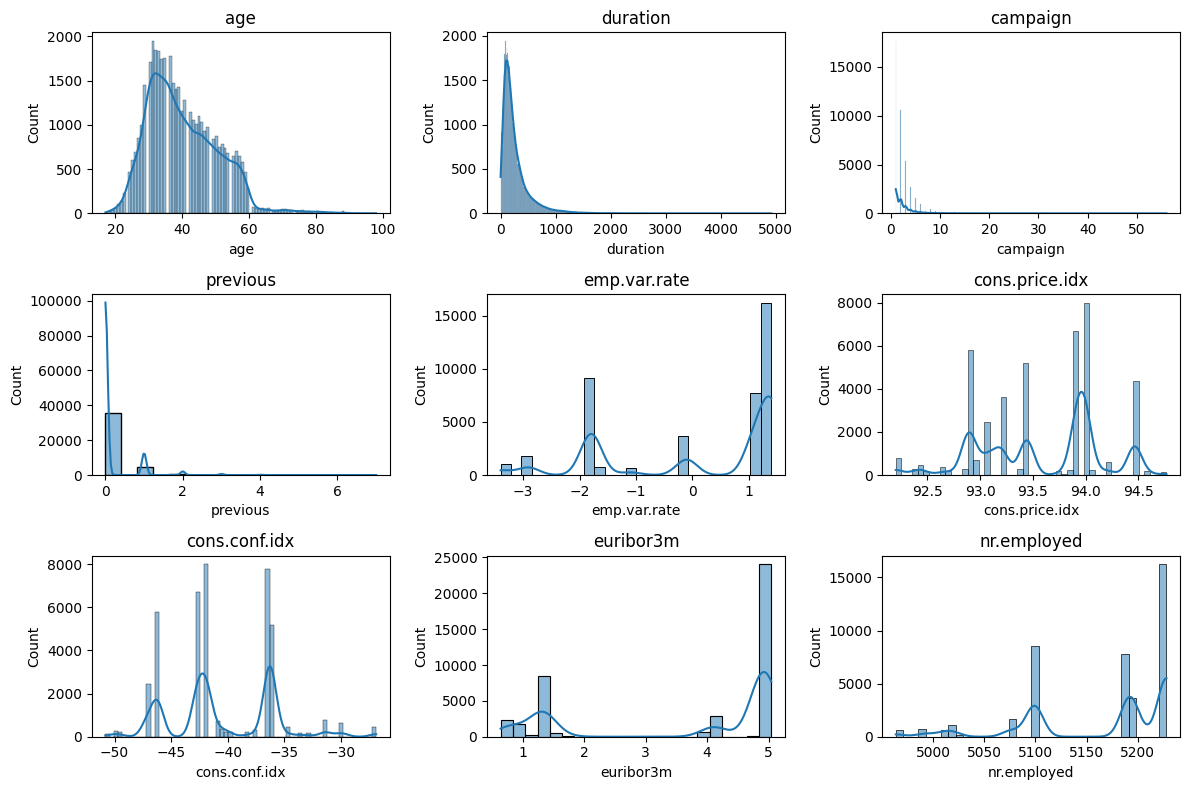

In [29]:
# Select numeric columns
numeric_cols = ['age', 'duration', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Plot distributions
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(bank_graph[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

I performed log scaling of duration before plotting again because it appears skewed to the right.

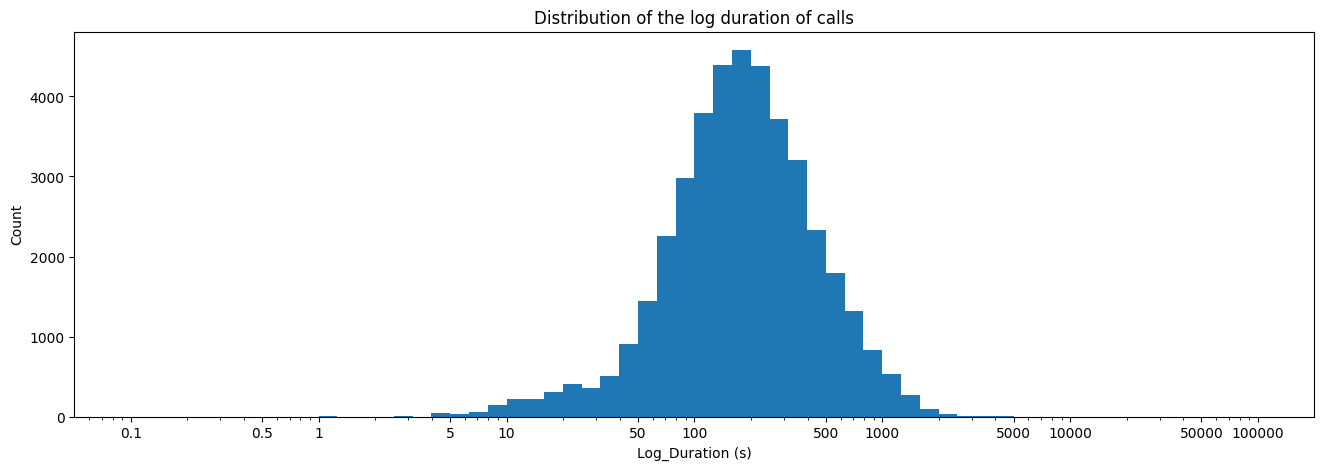

In [30]:
plt.figure(figsize=[16,5])
# Get the ticks for bins between [0 - maximum weight]
bins = 10 ** np.arange(-1, 5+0.1, 0.1)

# Generate the x-ticks you want to apply
ticks = [0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000,5000,10000,50000,100000]
# Convert ticks into string values, to be displayed along the x-axis
labels = ['{}'.format(v) for v in ticks]

# Plot the histogram
plt.hist(data=bank_graph, x='duration', bins=bins);
plt.title('Distribution of the log duration of calls')
plt.xlabel('Log_Duration (s)')
plt.ylabel('Count')

# The argument in the xscale() represents the axis scale type to apply.
plt.xscale('log')

# Apply x-ticks
plt.xticks(ticks, labels);

Distribution of the job type vs education

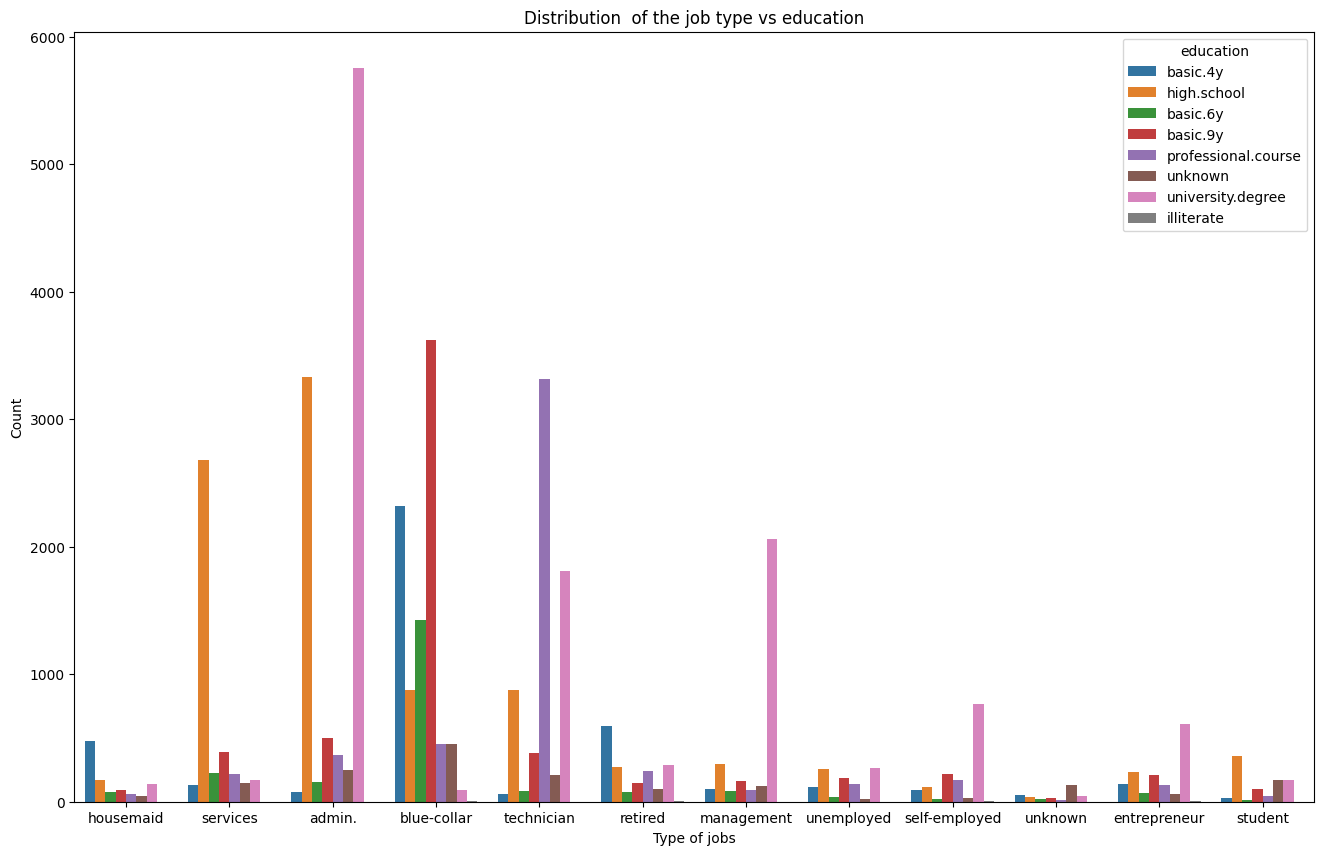

In [31]:
plt.figure(figsize = [16, 10])
sns.countplot(data = bank_graph, x = 'job', hue = 'education');
plt.title('Distribution  of the job type vs education')
plt.xlabel('Type of jobs')
plt.ylabel('Count');

From the visualization above it can be seen that most of the people counted are people working in the various job categories are people with a university degree or a high school certificate. The technicians are the job category with the highest count of people having a professional course certificate.

<ipython-input-32-3148958878>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='marital', y='age', data=bank_graph, estimator='mean', ci=None, palette='viridis')
<ipython-input-32-3148958878>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='marital', y='age', data=bank_graph, estimator='mean', ci=None, palette='viridis')


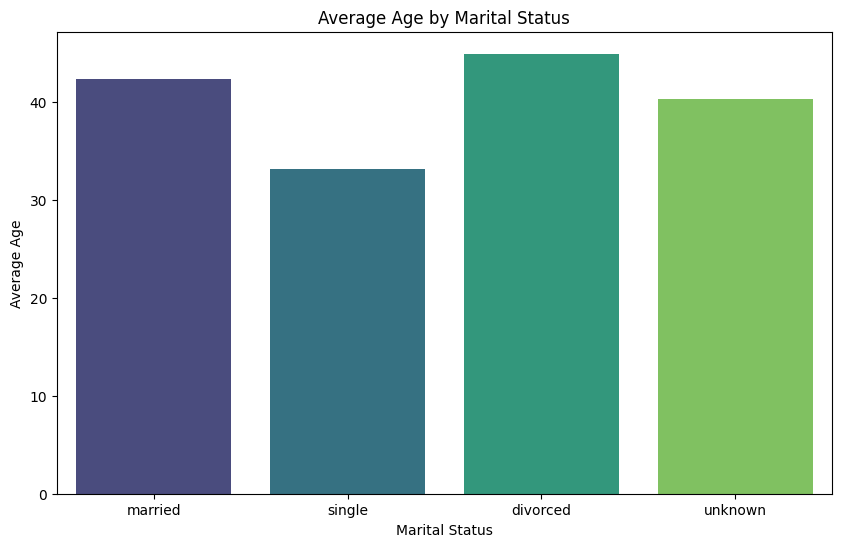

In [32]:
# Bar Plot (Average Age per Marital Status)
plt.figure(figsize=(10, 6))
sns.barplot(x='marital', y='age', data=bank_graph, estimator='mean', ci=None, palette='viridis')
plt.title('Average Age by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Average Age')
plt.show()

From the graph those that have their marital status to be divorced have the highest average age followed by those who are married. The single category has the lowest averge age when compared to the other categories.

<ipython-input-33-4111192870>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='marital', y='age', data=bank_graph, palette='Set2')


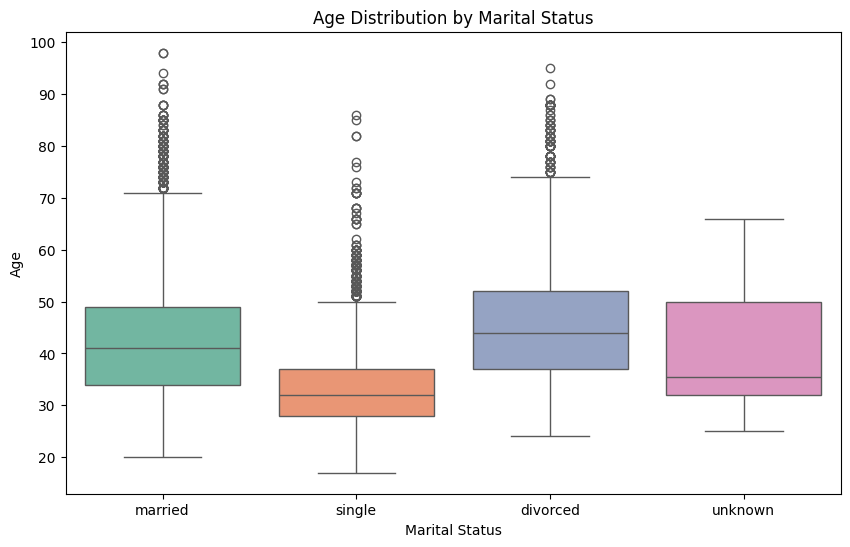

In [33]:
# Box Plot (Age Distribution per Marital Status)
plt.figure(figsize=(10, 6))
sns.boxplot(x='marital', y='age', data=bank_graph, palette='Set2')
plt.title('Age Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Age')
plt.show()

<ipython-input-34-553010414>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='job', y='age', data=bank_graph, estimator='mean', ci=None, palette='viridis')
<ipython-input-34-553010414>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='job', y='age', data=bank_graph, estimator='mean', ci=None, palette='viridis')


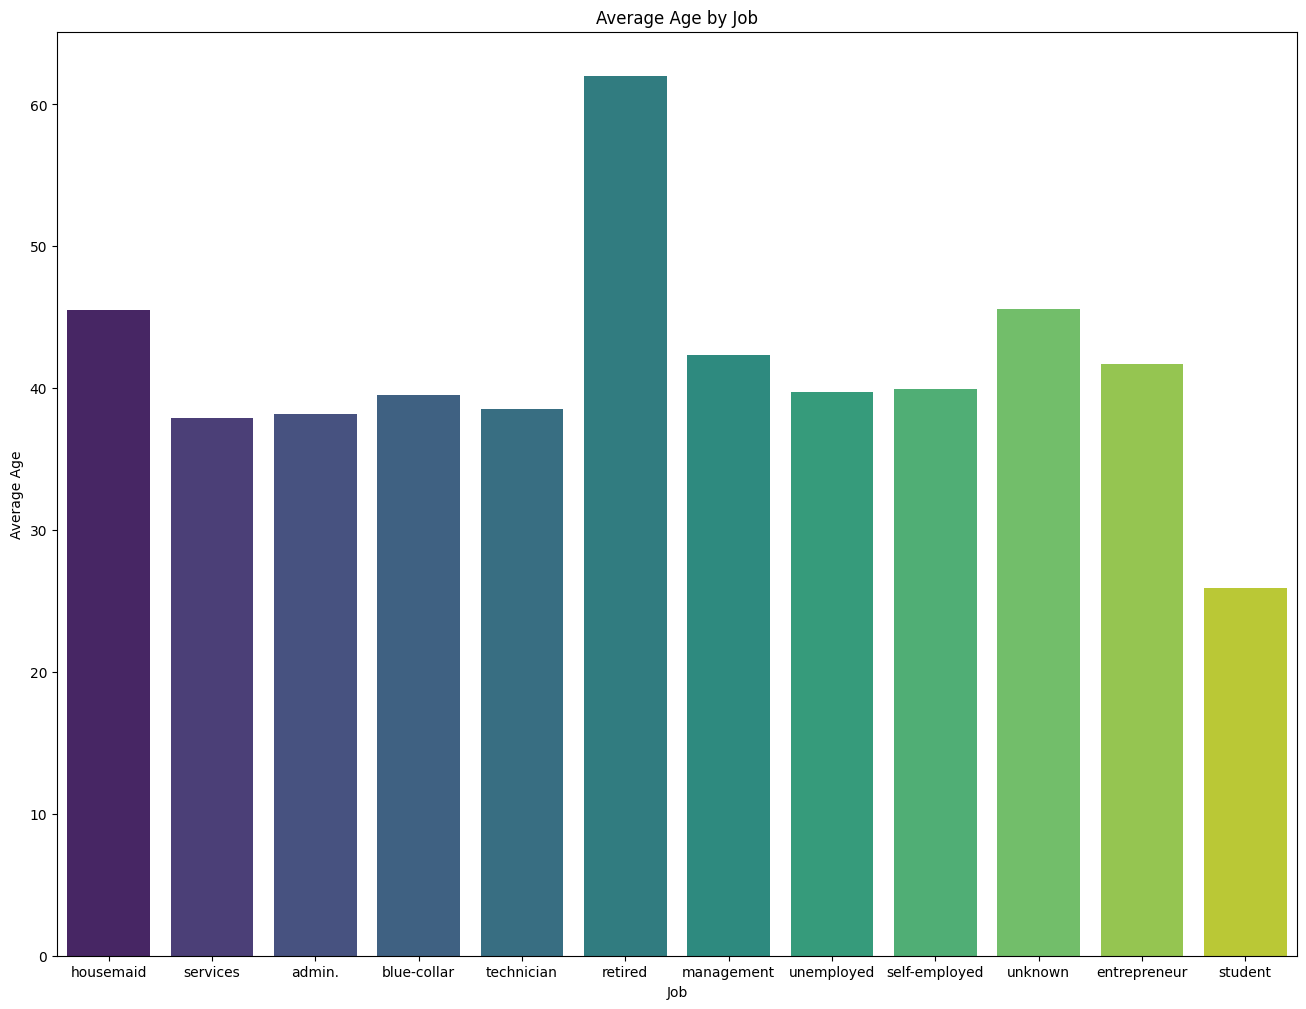

In [34]:
# Bar Plot (Average Age per Job)
plt.figure(figsize=(16, 12))
sns.barplot(x='job', y='age', data=bank_graph, estimator='mean', ci=None, palette='viridis')
plt.title('Average Age by Job')
plt.xlabel('Job')
plt.ylabel('Average Age')
plt.show()

From the graph those that have their job status to be retired have the highest average age followed by those who are house maids. The students have the lowest average age when compared.